**Principal Component Analysis**
It is a dimensionality reduction techique that lets you distill the multi-dimensional data down to a fewer dimensions by selecting a new dimension that preserves the variance in the data.

Here we use the Iris dataset in scikit-learn, which ahs a four dimensions of data for three different kinds of Iris flowers. The length and width of both the petals and sepals of many individual flowers from each species.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples) #total number of samples
print(numFeatures) #total number of features
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


Since there is 4 features each feature is a dimension so our brains can't visualise the data. So using PCA we can reduce the 4D data to 2 orthogonal 2D data using PCA without affecting the variance

In [0]:
X = iris.data
pca = PCA(n_components=2,whiten=True).fit(X) # n_components defines the number of dimensions the data is reduced to. Whiten normalises the data by itself.
X_pca = pca.transform(X)

In [6]:
print(pca.components_) #those 2 4D eigen vectors used are

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


PCA model returns explained variance ratio which defines how much of the previous variance is preserved. 

In [7]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


Lets visualise it 

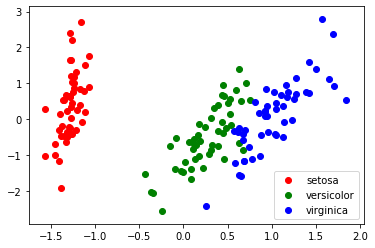

In [8]:
%matplotlib inline
from pylab import *

colors = cycle('rgb') # set colors
target_ids = range(len(iris.target_names))
pl.figure()

for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    